In [1]:
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-04\data\lev-04_merged.parquet"

pdf = pl.read_parquet(path)

In [4]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

mp_data['State'].unique()

State
str
"""23"""


In [5]:
lev_04_fin = ['Ration_Any_Item_Last_30_Days' ,'Ration_Rice',
              'Ration_Wheat','Ration_Coarse_Grain',
              'Ration_Sugar','Ration_Pulses',
              'Ration_Edible_Oil','Ration_Other_Food_Items']

lev_04_digital = [
    'Online_Groceries',
'Online_Milk',
'Online_Vegetables',
'Online_Fresh_Fruits',
'Online_Dry_Fruits',
'Online_Egg_Fish_Meat',
'Online_Served_Processed_Food',
'Online_Packed_Processed_Food',
'Online_Other_Food_Items',
]

lev_04_behavior = ['Ceremony_Performed_Last_30_Days']
lev_04_food = ['Meals_Served_to_Non_HH_Members']

In [6]:
lev_04_cols = (
    lev_04_food 
    + lev_04_behavior
    + lev_04_digital 
    + lev_04_fin
)

In [7]:
mp_data = mp_data[lev_04_cols]

<Axes: ylabel='Count'>

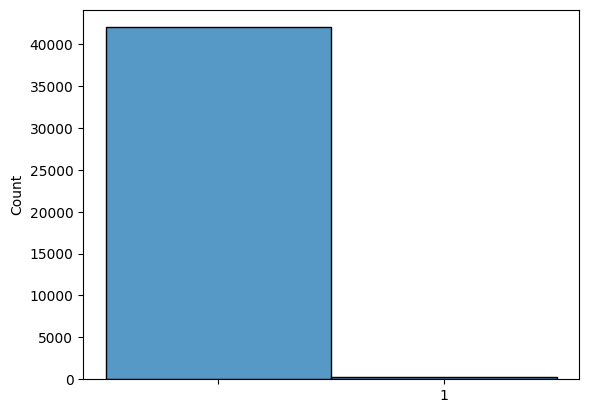

In [9]:
sns.histplot(mp_data['Online_Dry_Fruits'])

In [10]:
mp_df = mp_data.to_pandas()

C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\scipy\cluster\hierarchy.py:2823: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])
C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


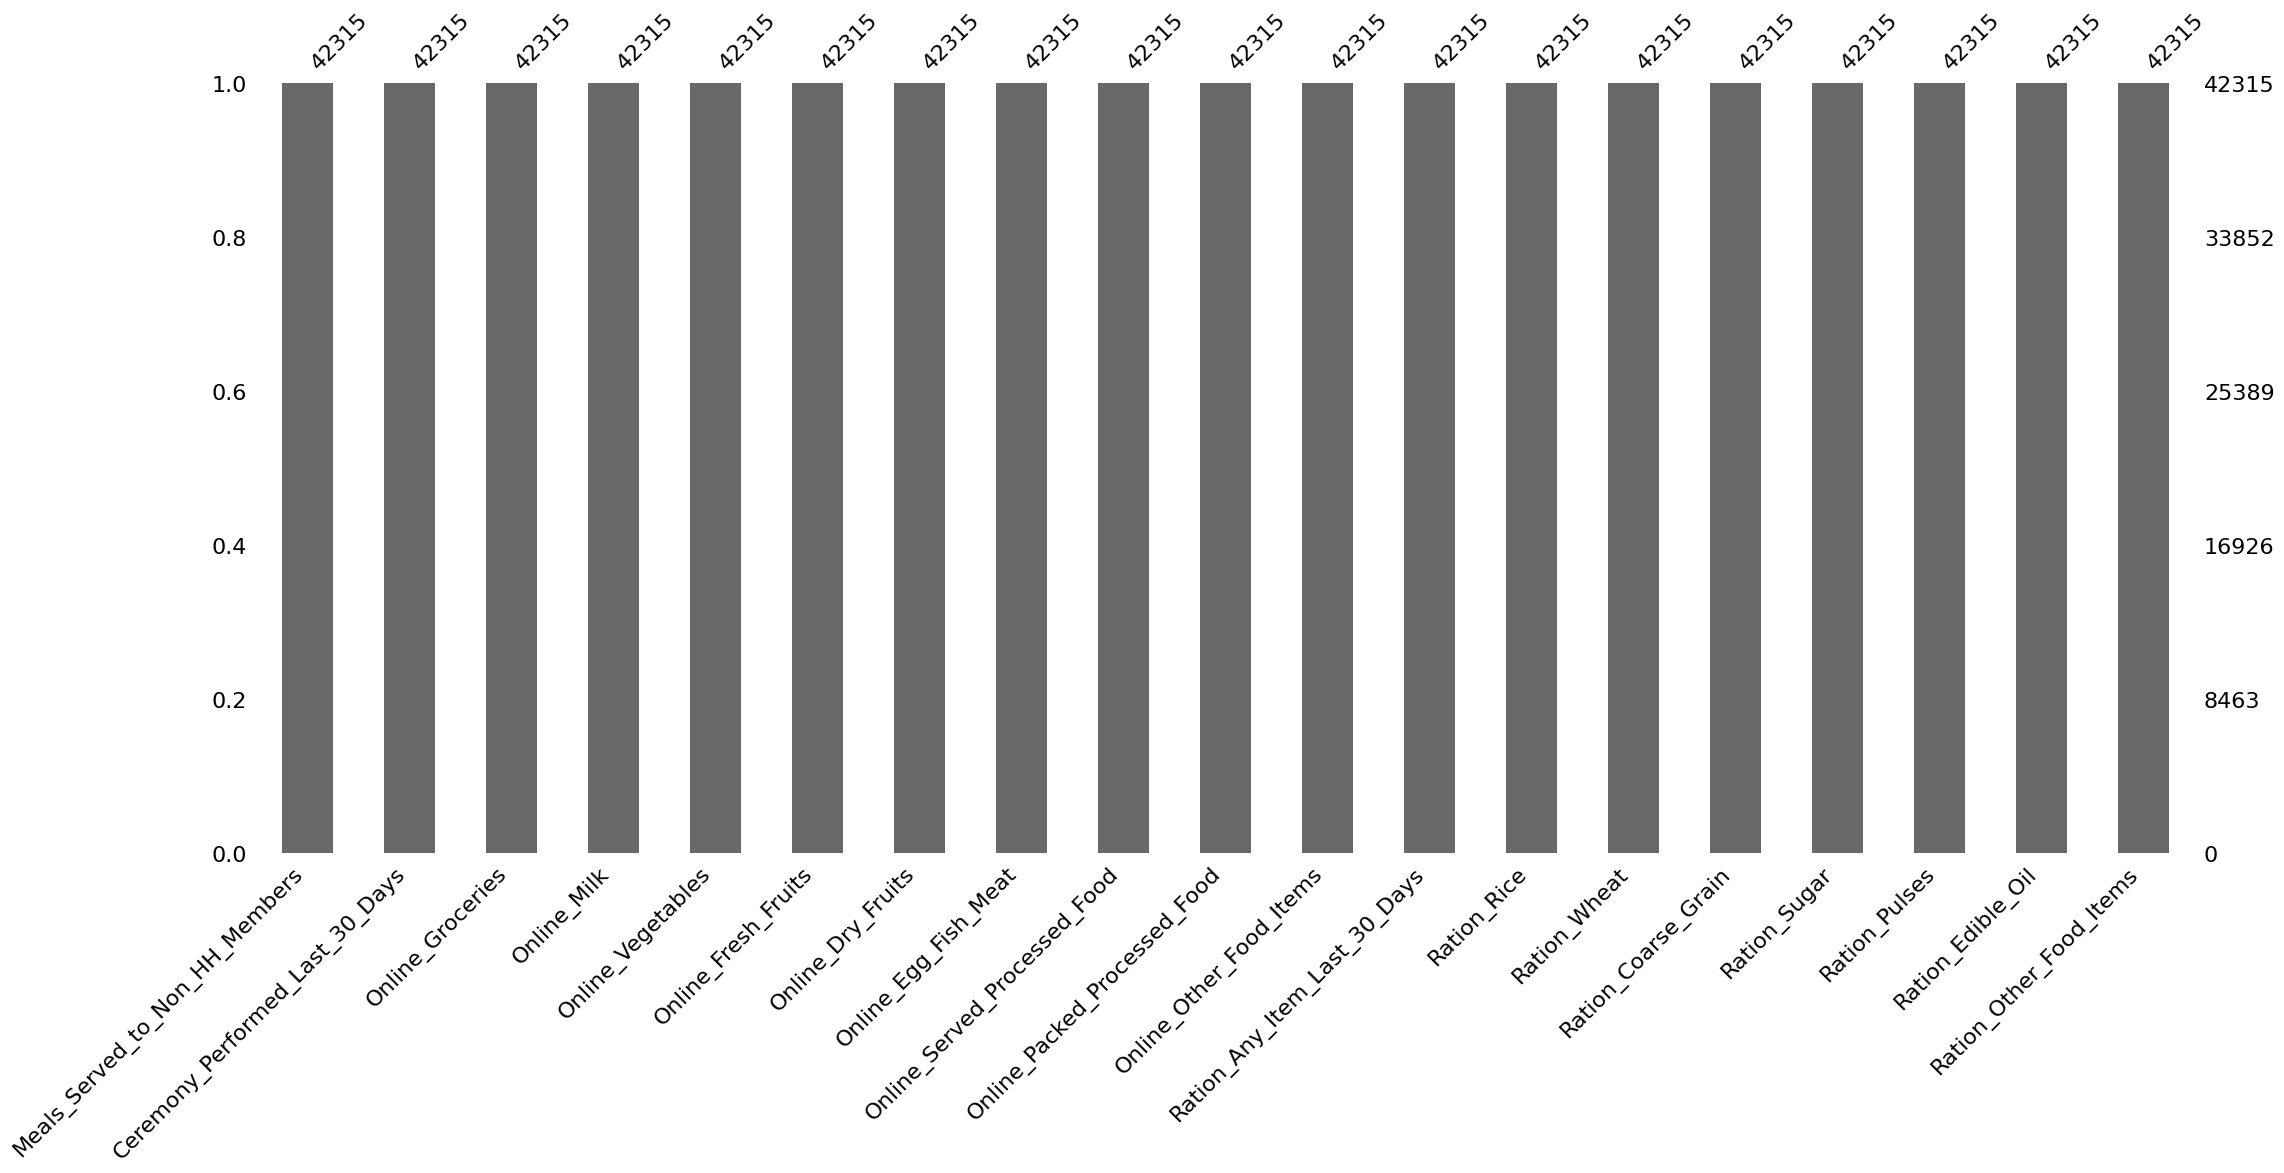

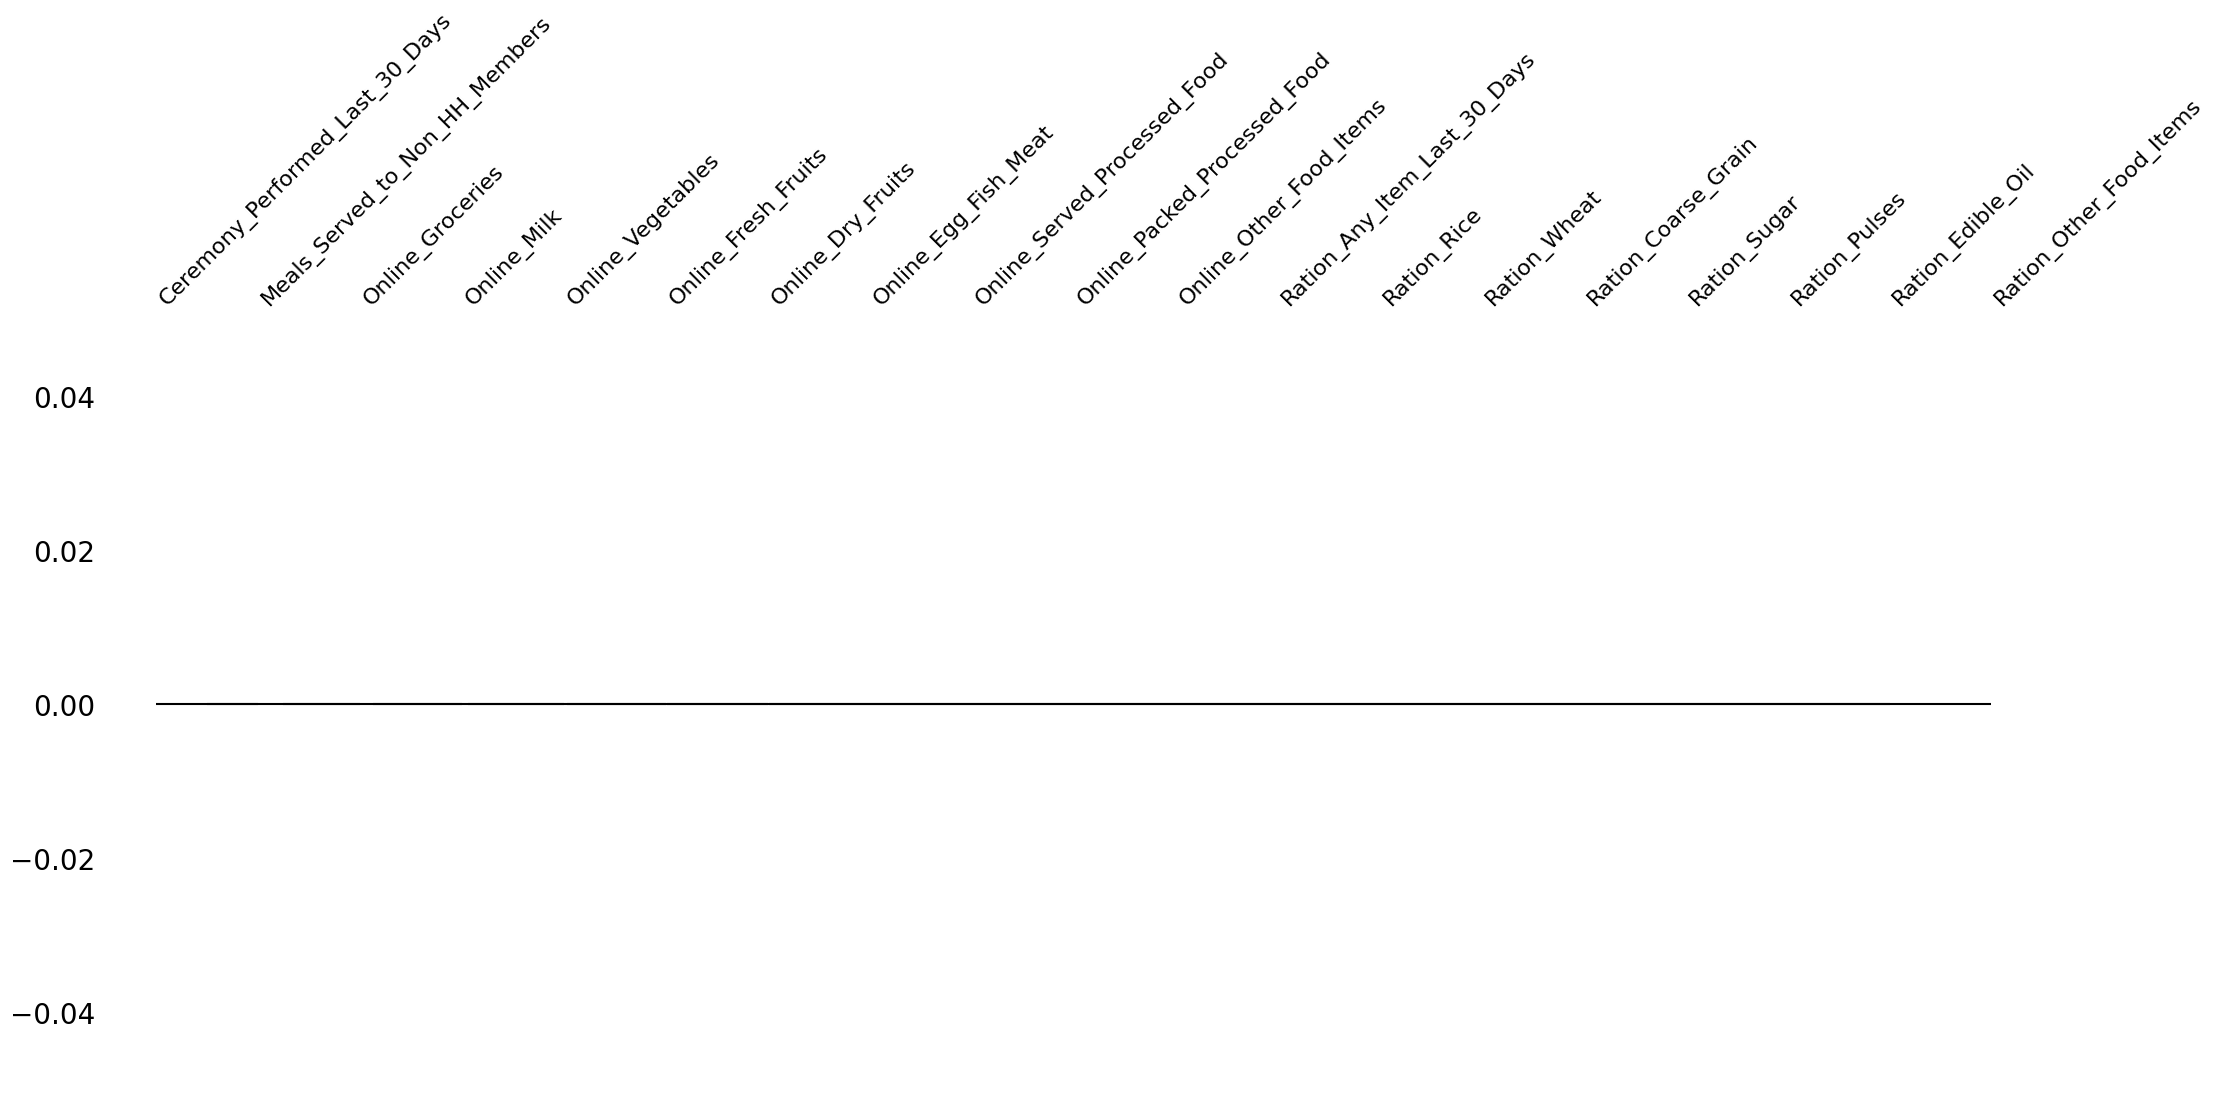

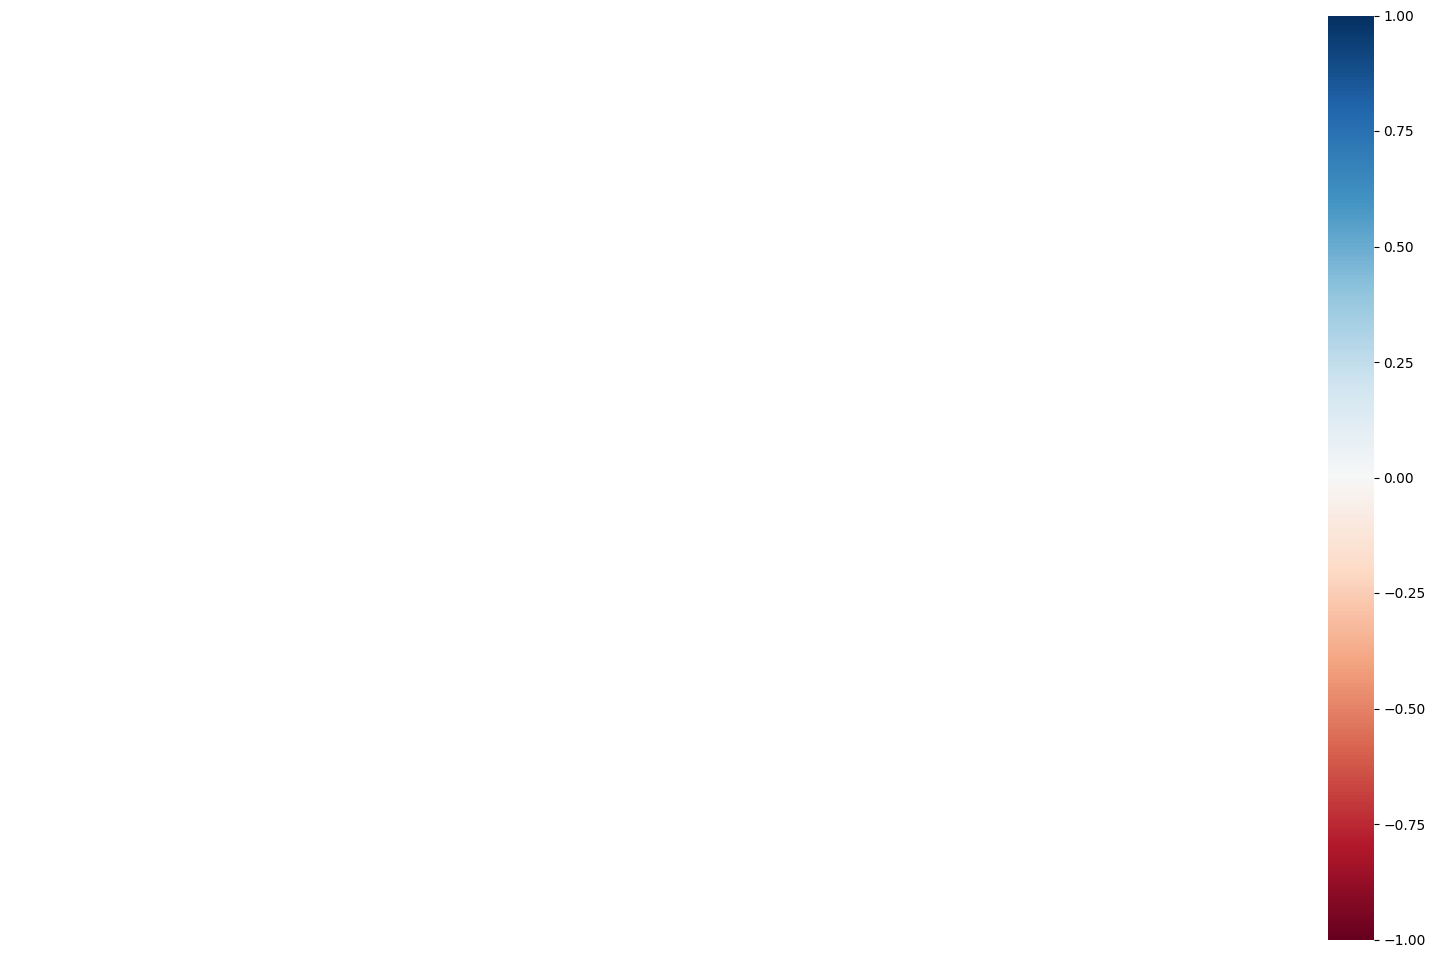

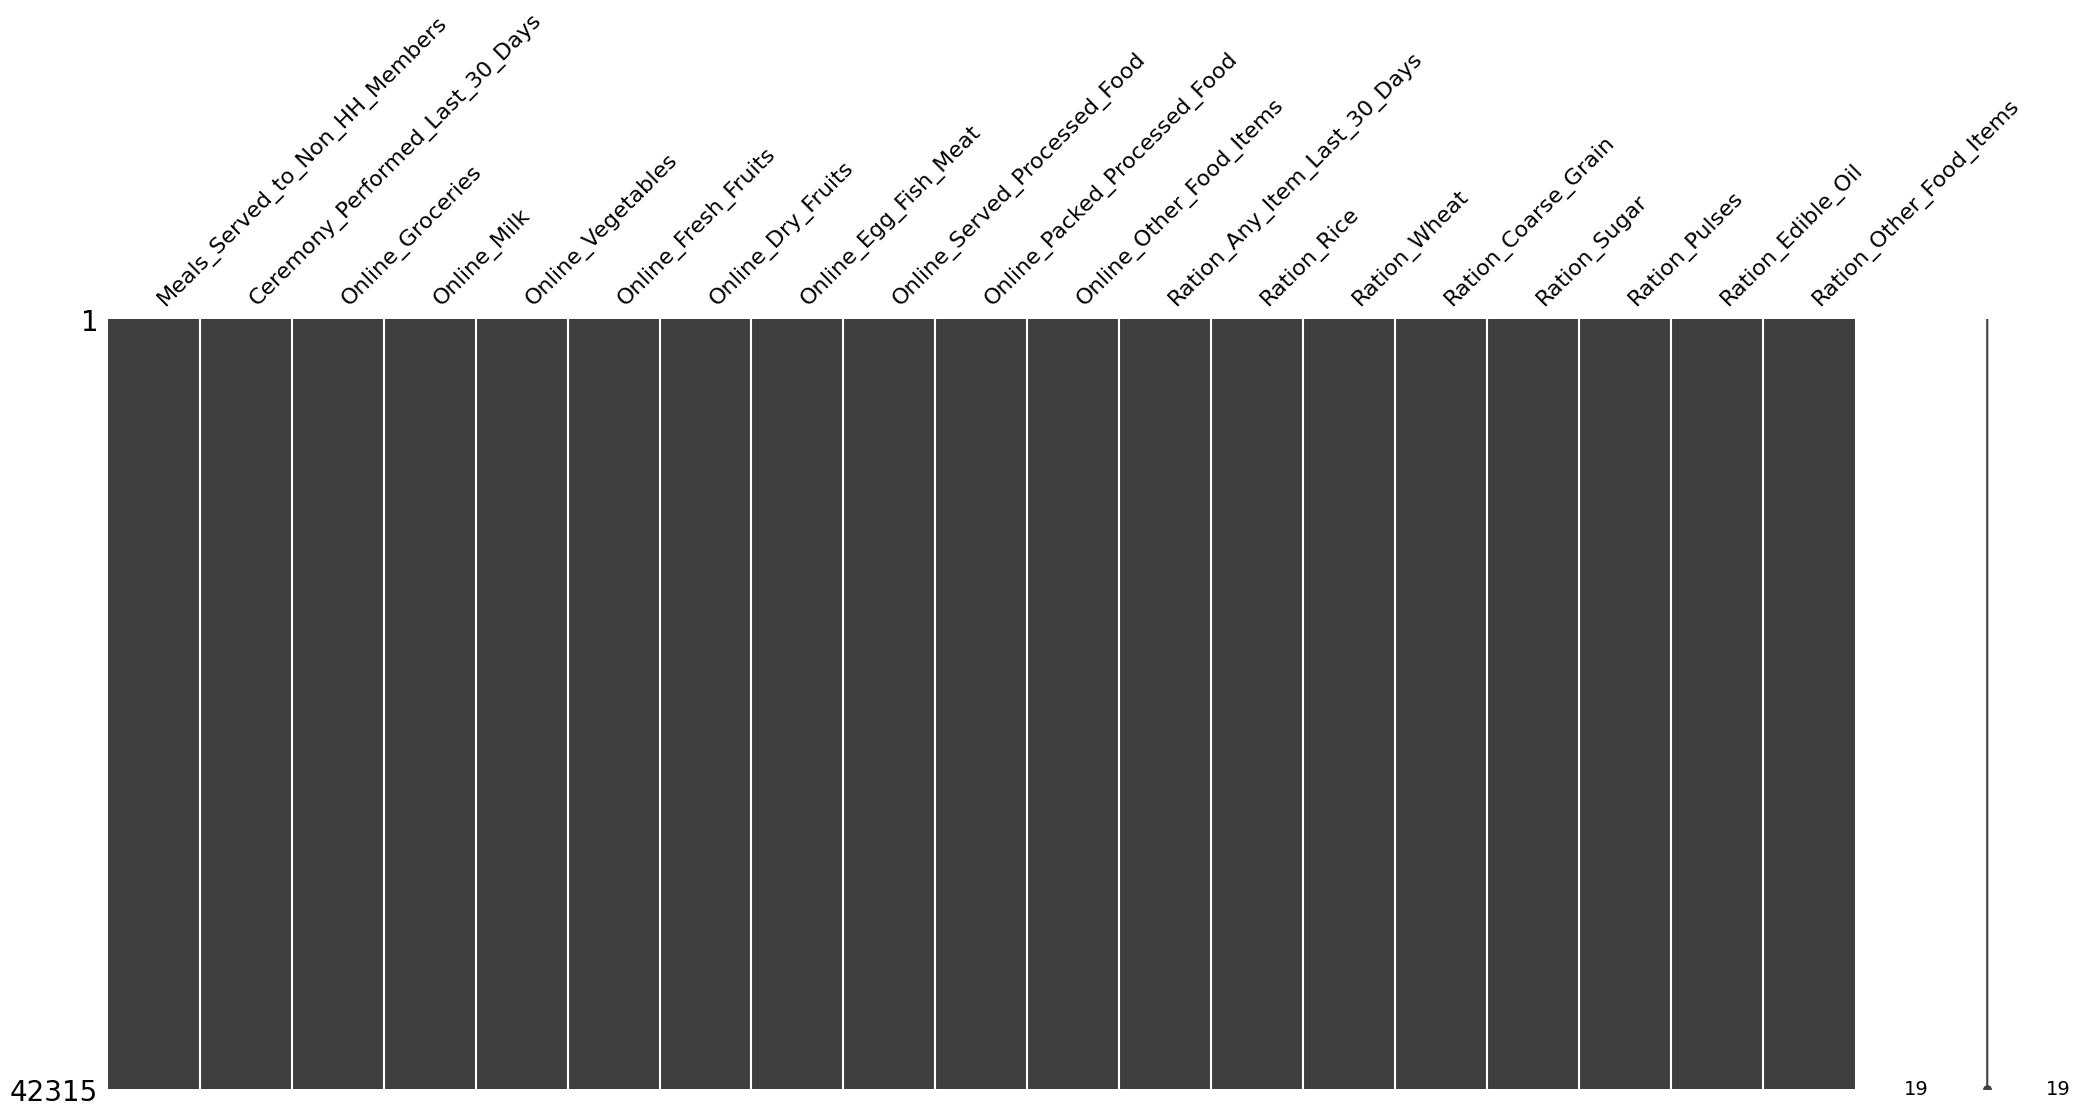

In [11]:
plot_null(mp_df)

In [13]:
import polars as pl

for col in lev_04_cols:
    invalid = mp_data.filter(
        ~pl.col(col).str.contains(r"^-?\d+$")
    )
    if invalid.height > 0:
        print(f"Column {col} has invalid integer strings in '{col}':")
        print(invalid.select(col))

Column Online_Groceries has invalid integer strings in 'Online_Groceries':
shape: (41_016, 1)
┌──────────────────┐
│ Online_Groceries │
│ ---              │
│ str              │
╞══════════════════╡
│                  │
│                  │
│                  │
│                  │
│                  │
│ …                │
│                  │
│                  │
│                  │
│                  │
│                  │
└──────────────────┘
Column Online_Milk has invalid integer strings in 'Online_Milk':
shape: (42_003, 1)
┌─────────────┐
│ Online_Milk │
│ ---         │
│ str         │
╞═════════════╡
│             │
│             │
│             │
│             │
│             │
│ …           │
│             │
│             │
│             │
│             │
│             │
└─────────────┘
Column Online_Vegetables has invalid integer strings in 'Online_Vegetables':
shape: (41_874, 1)
┌───────────────────┐
│ Online_Vegetables │
│ ---               │
│ str               │
╞════════

In [14]:
mp_data = mp_data.with_columns([
    pl.col(col).str.strip_chars().alias(col) for col in lev_04_cols
])

mp_data = mp_data.with_columns([
    pl.when(pl.col(col).str.contains(r"^-?\d+$"))
      .then(pl.col(col).cast(pl.Int64))
      .otherwise(None)
      .alias(col)
    for col in lev_04_cols
])


InvalidOperationError: conversion from `str` to `i64` failed in column 'Ration_Coarse_Grain' for 42315 out of 42315 values: ["", "", … ""]

Did not show all failed cases as there were too many.

In [15]:
mp_data = mp_data.with_columns([
    pl.col(col).cast(pl.Utf8).alias(col) for col in lev_04_cols
])


In [16]:
mp_data = mp_data.with_columns([
    pl.col(col).str.strip_chars().alias(col) for col in lev_04_cols
])


In [ ]:
pdf['Online_Milk']

In [21]:
df_clean = pdf.with_columns(
    pl.col("Online_Milk")
      .str.strip_chars()                      # remove spaces
      .replace("", None)                      # turn empty strings into nulls
      .cast(pl.Int64, strict=False)           # cast safely
      .alias("Online_Milk")
)

df_clean['Online_Milk'].describe()

statistic,value
str,f64
"""count""",11805.0
"""null_count""",774054.0
"""mean""",1.0
"""std""",0.0
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",1.0


In [17]:
mp_data = mp_data.with_columns([
    pl.when(
        pl.col(col).str.replace_all(r"\s+", "")      # remove hidden spaces
        .str.contains(r"^-?\d+$", literal=False)     # valid integer pattern
    )
    .then(pl.col(col).cast(pl.Int64))
    .otherwise(None)
    .alias(col)
    for col in lev_04_cols
])


InvalidOperationError: conversion from `str` to `i64` failed in column 'Online_Milk' for 42003 out of 42315 values: ["", "", … ""]

Did not show all failed cases as there were too many.

In [ ]:
import polars as pl

df = pl.DataFrame({
    "a": ["1", "2", "x", "3", "", " 4"]
})

df2 = df.with_columns(
    pl.col("a").cast(pl.Int64, strict=False)
)

print(df2)


In [12]:
for col in lev_04_cols:
    invalid = mp_data.filter(~pl.col(col).str.full_match(r"^-?\d+$"))
    if invalid.height > 0:
        print(f"Column {col} has invalid integers:")
        print(invalid.select(col))


AttributeError: 'ExprStringNameSpace' object has no attribute 'full_match'

In [25]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int64, strict=False) for col in lev_04_cols]
)
mp_data.schema

Schema([('Meals_Served_to_Non_HH_Members', Int64),
        ('Ceremony_Performed_Last_30_Days', Int64),
        ('Online_Groceries', Int64),
        ('Online_Milk', Int64),
        ('Online_Vegetables', Int64),
        ('Online_Fresh_Fruits', Int64),
        ('Online_Dry_Fruits', Int64),
        ('Online_Egg_Fish_Meat', Int64),
        ('Online_Served_Processed_Food', Int64),
        ('Online_Packed_Processed_Food', Int64),
        ('Online_Other_Food_Items', Int64),
        ('Ration_Any_Item_Last_30_Days', Int64),
        ('Ration_Rice', Int64),
        ('Ration_Wheat', Int64),
        ('Ration_Coarse_Grain', Int64),
        ('Ration_Sugar', Int64),
        ('Ration_Pulses', Int64),
        ('Ration_Edible_Oil', Int64),
        ('Ration_Other_Food_Items', Int64)])

In [26]:
mp_df = mp_data.to_pandas()

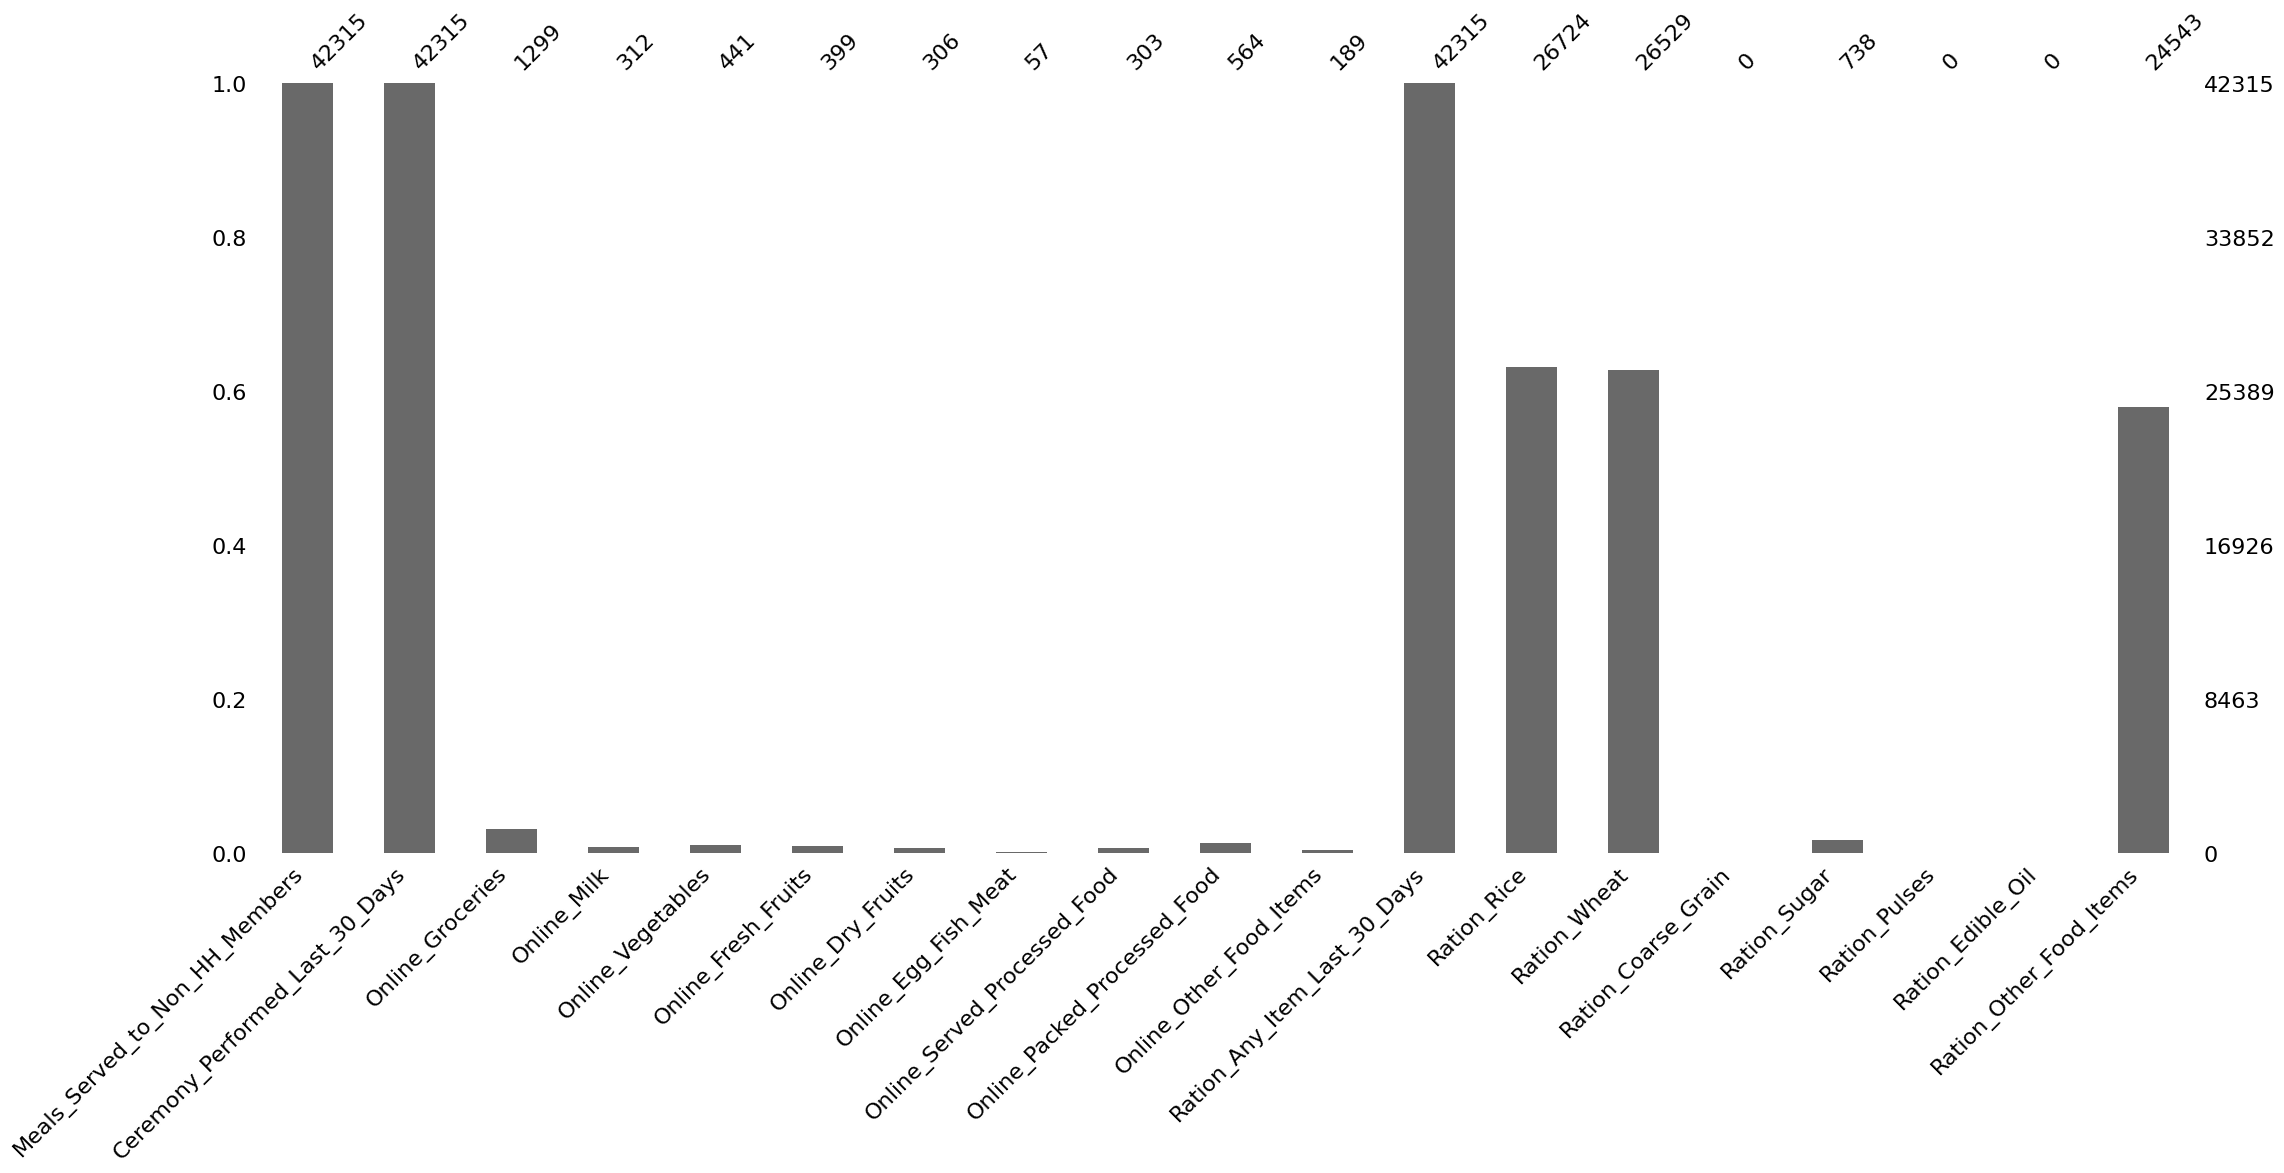

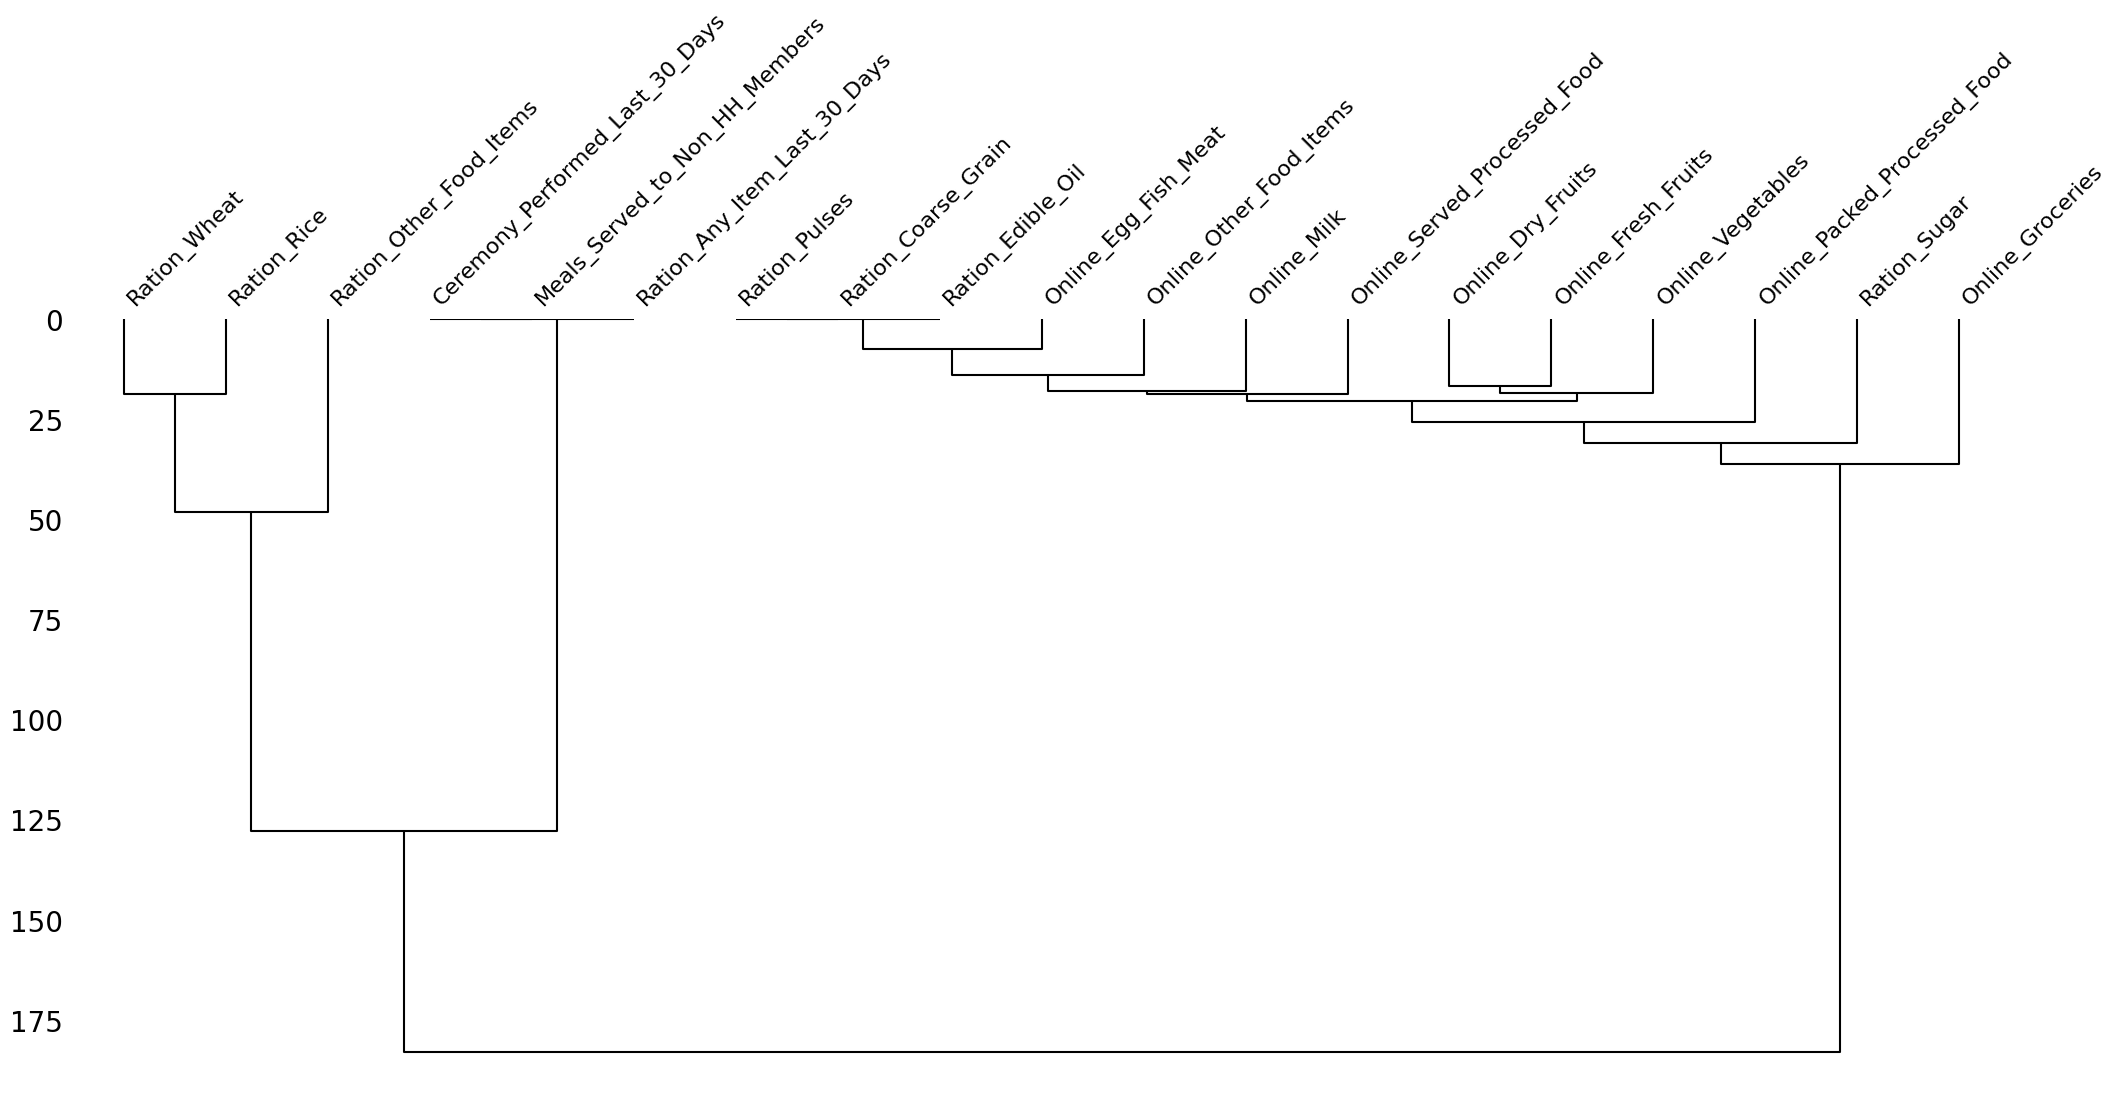

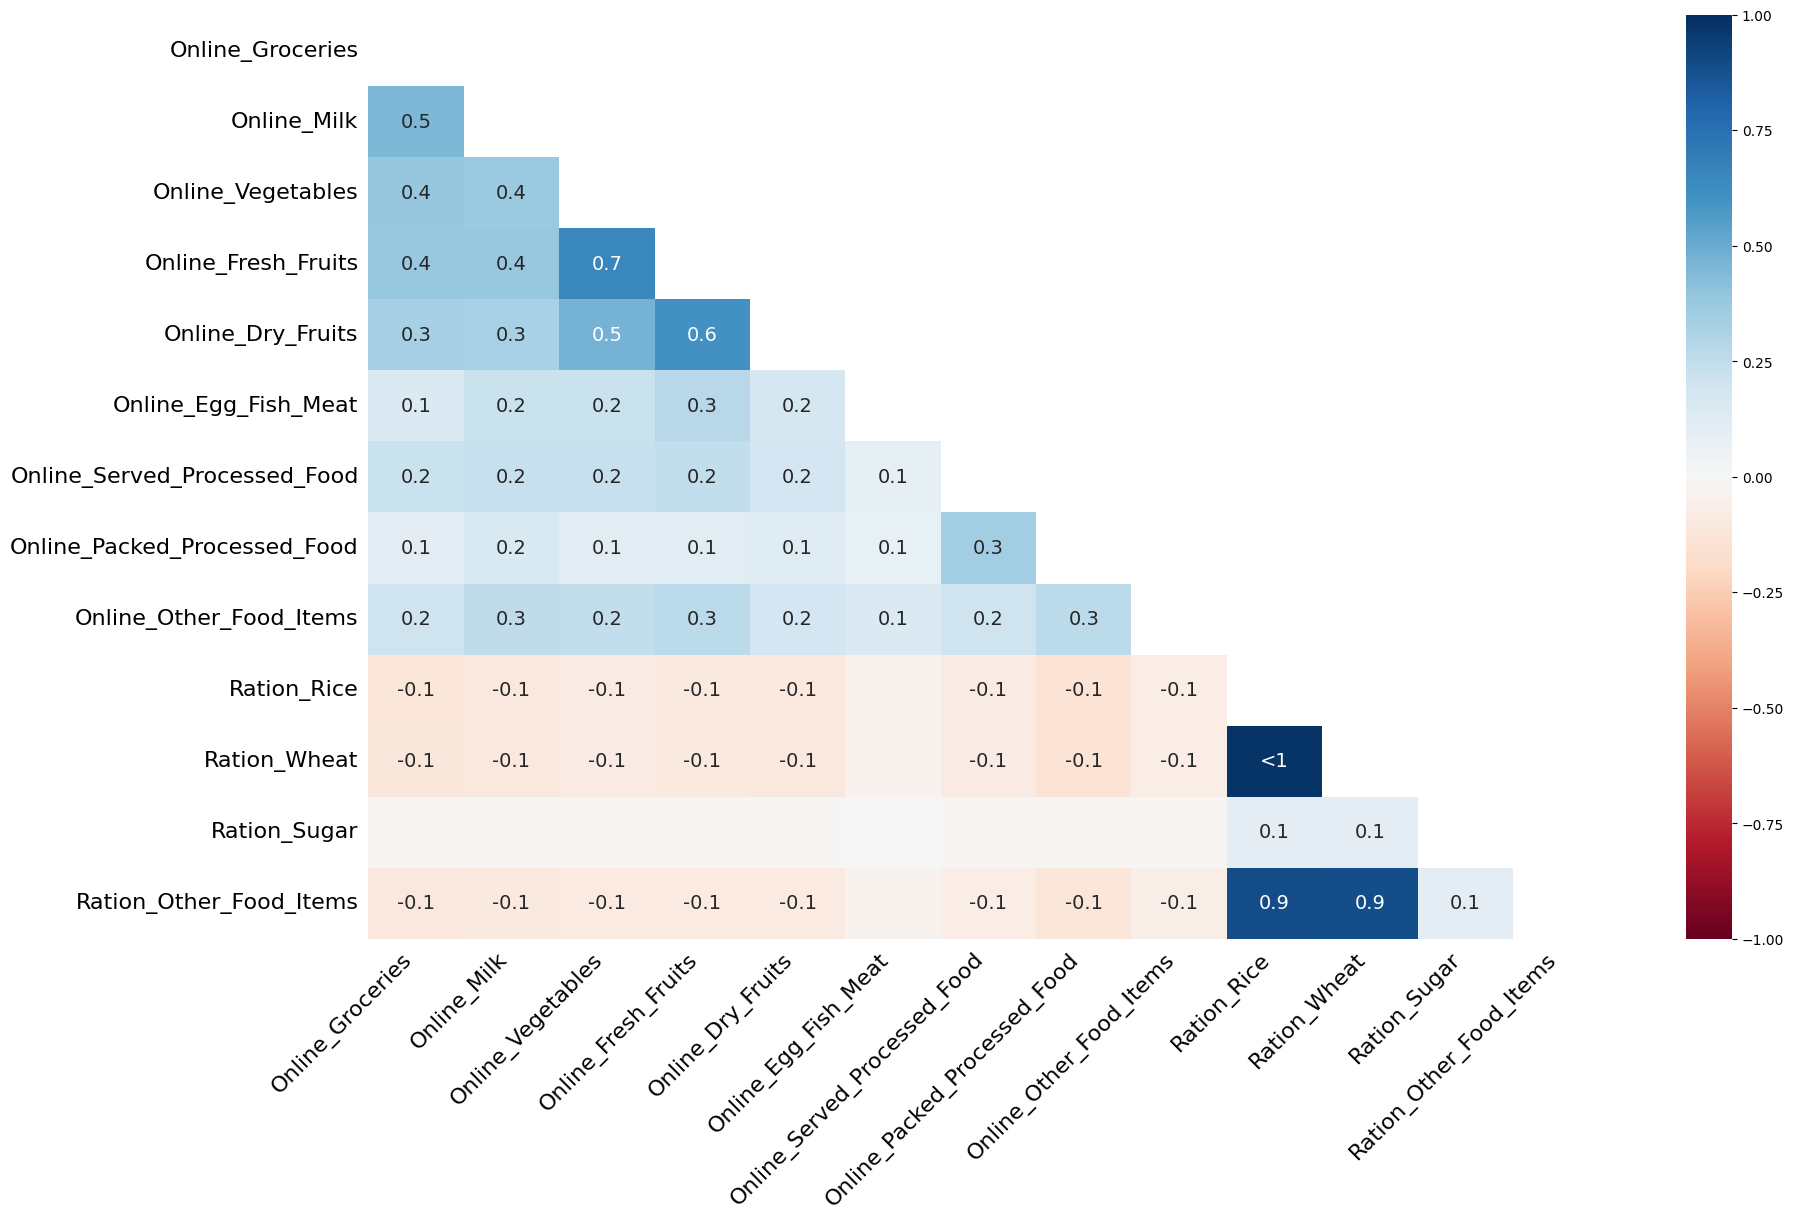

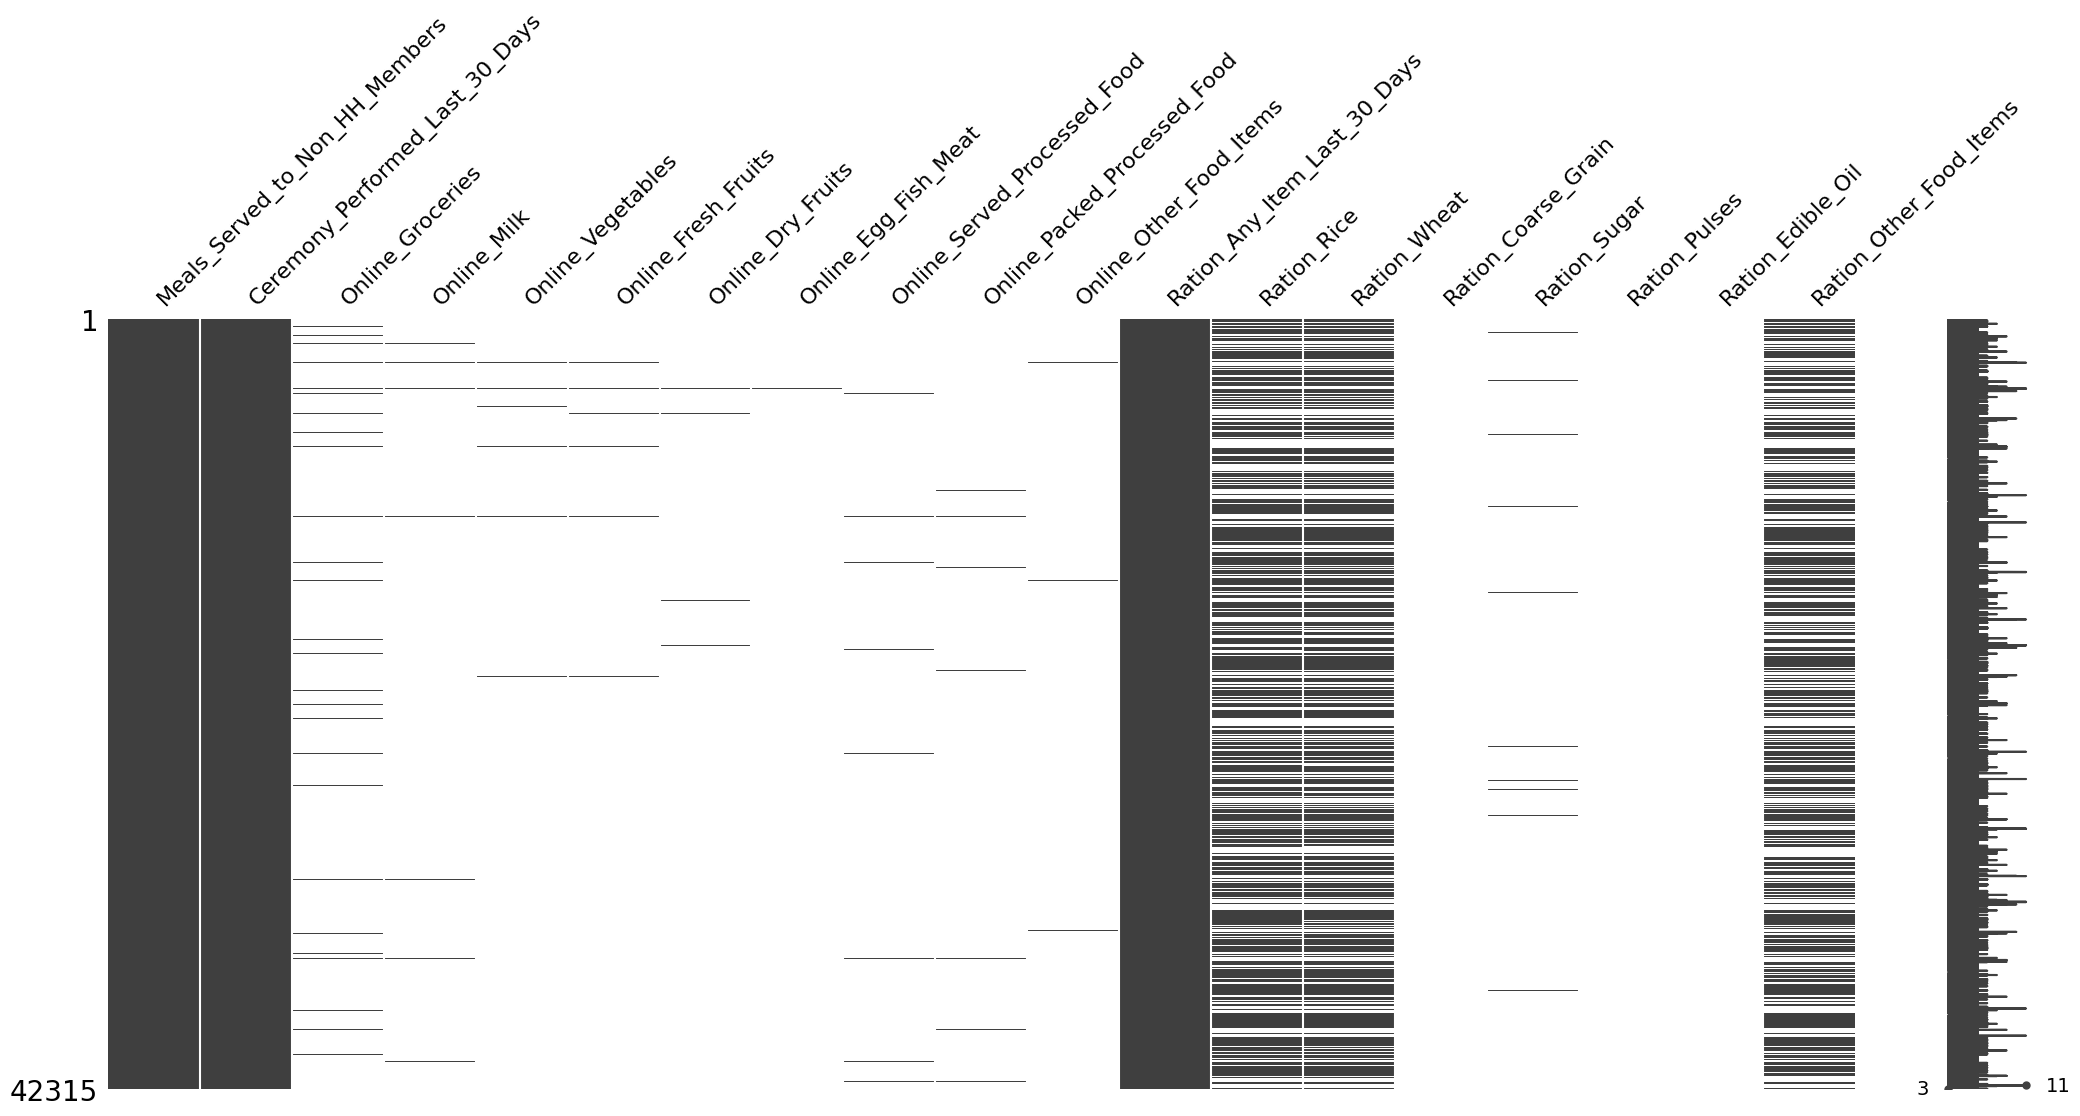

In [27]:
plot_null(mp_df)